In [1]:
%load_ext autoreload
%autoreload 2

# PSN (Partitioning Signal and Noise) Demo

This notebook demonstrates how to use PSN to denoise neural data. PSN is a method for partitioning neural population responses into signal and noise components, which can improve the signal-to-noise ratio of neural recordings.

## Overview

1. **Import Libraries**: Load necessary packages
2. **Generate Sample Data**: Create synthetic neural data with known signal/noise structure
3. **Run PSN Analysis**: Apply PSN denoising to the data
4. **Visualize Results**: Display diagnostic figures showing the denoising performance

## 1. Import Required Libraries

Import the necessary libraries including PSN, NumPy for data generation, and Matplotlib for visualization.

In [2]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for notebook
%matplotlib inline

# PSN library
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import psn
from psn import simulate
from psn import PSN


# Set up plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print(f"PSN version: {psn.__version__}")

Libraries imported successfully!
PSN version: 0.1.0


## 2. Generate Sample Data

Create synthetic neural data with a known signal/noise structure. We'll simulate:
- Multiple neural units (neurons)
- Multiple experimental conditions
- Multiple trials per condition
- Low-dimensional signal shared across trials
- Independent noise for each trial

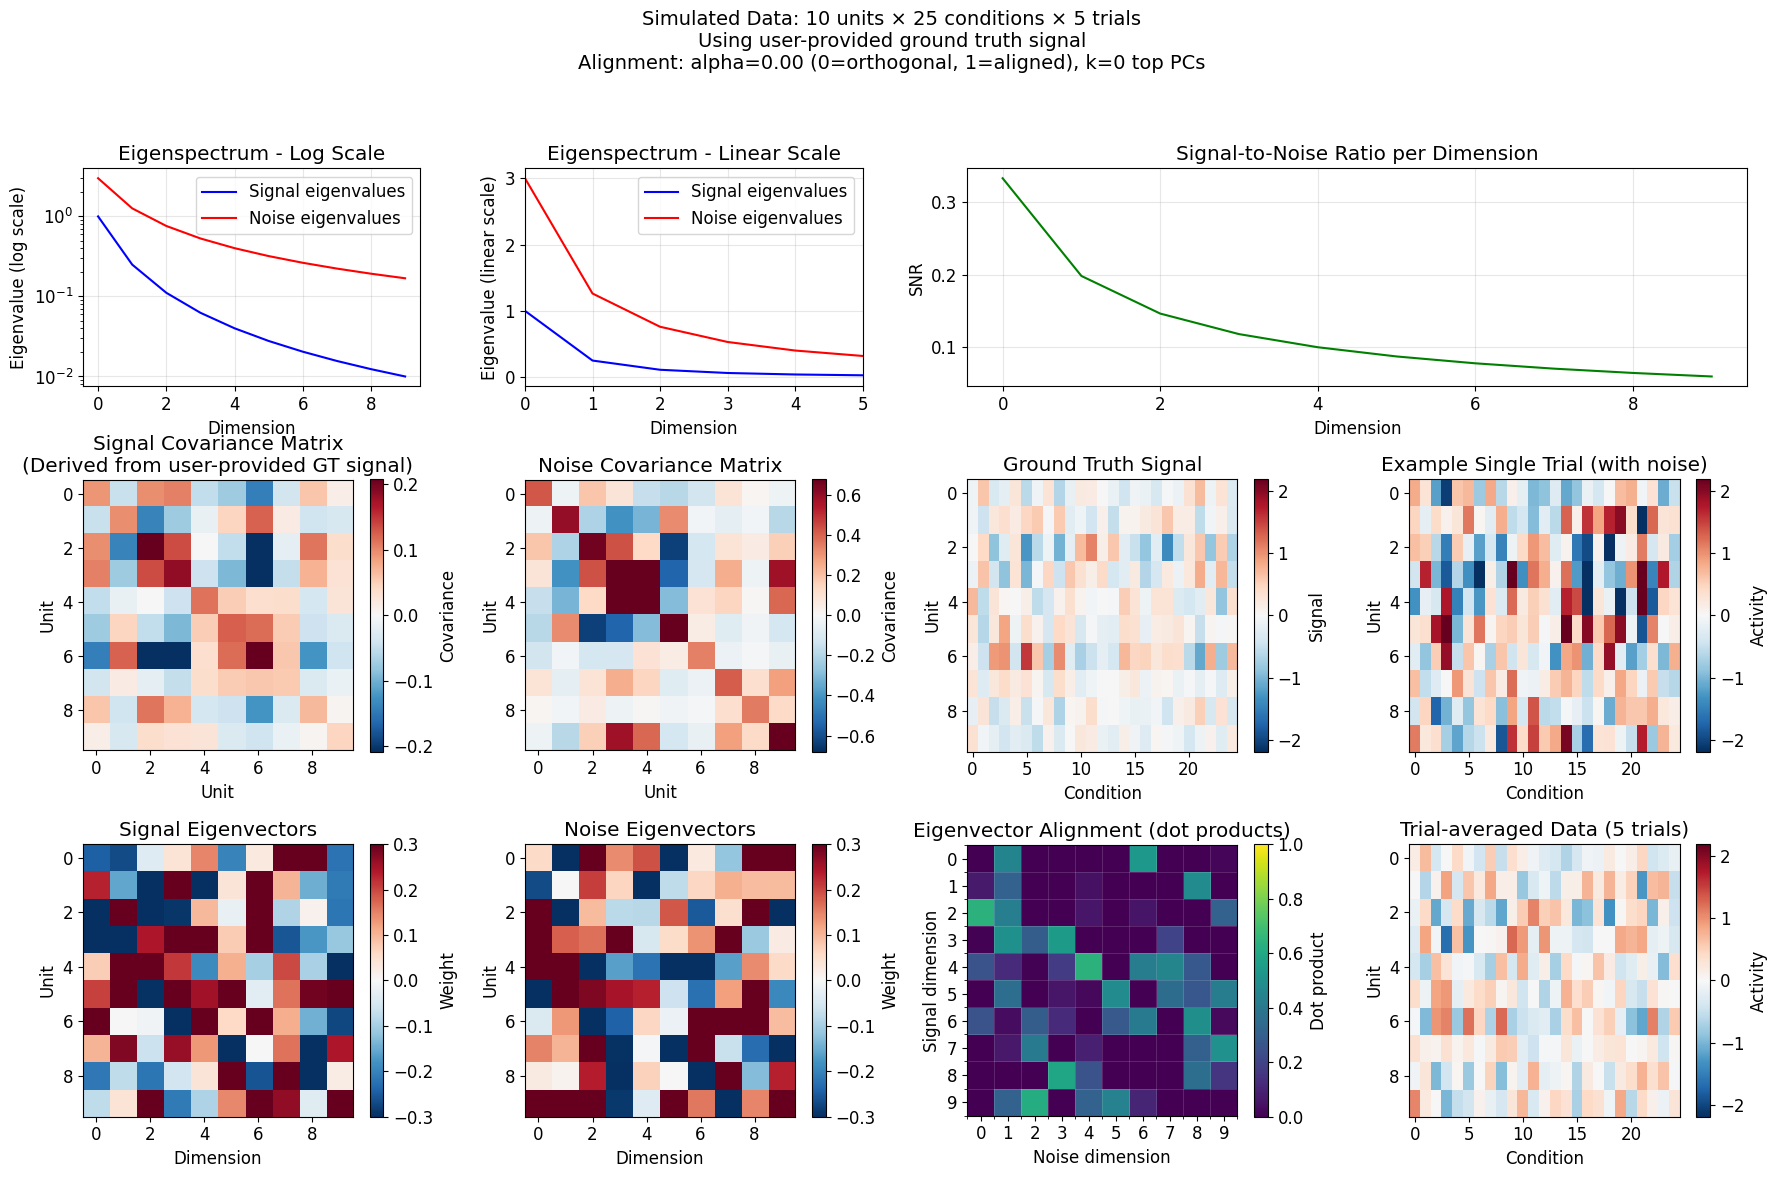

In [3]:
data, _, _ = simulate.generate_data(nvox=10, ncond=25, ntrial=5, noise_decay=1.25, signal_decay=2,
                                    noise_multiplier=3, want_fig=True)

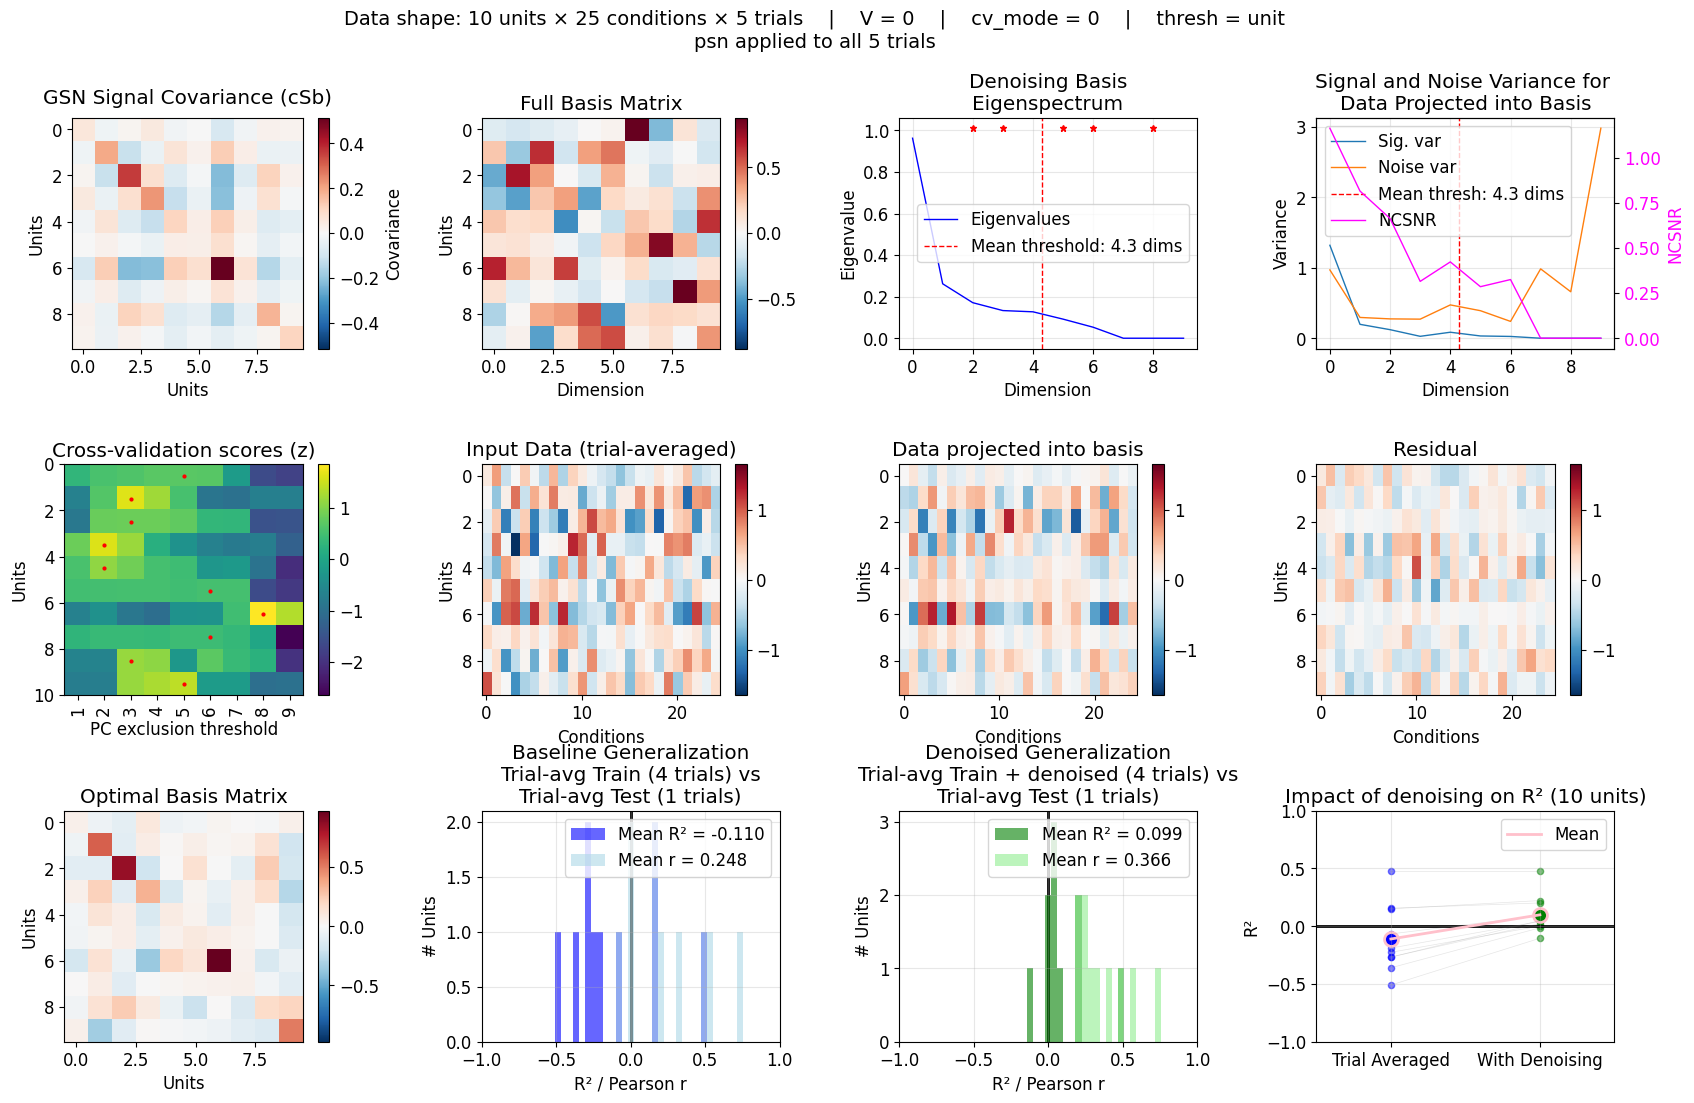

In [5]:
denoiser = PSN()
signal = denoiser.fit_transform(data)
